In [1]:
import pandas as pd
import inspect

In [3]:
df = pd.read_csv(
  filepath_or_buffer='https://raw.githubusercontent.com/aaronmcdaid/P2---Data-Analytics-With-Python/master/Berlin/WS%202019/5.%20Datasets/titanic_dataset/train.csv',
)

In [6]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


First Statistical Concept (Who, what, How)
It is about who got that data(its obectivity)? What is the data (its Validity)? How has it been obtained (its reliability)? More generally this step is baout congnitive bias e.g what do the column SibSp and Parch mean.

In [8]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [14]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**First Statistical functions**

Lets take a look at the data with describe. it will show you different values, but what do they mean?

In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
print(df.std.__doc__)


Return sample standard deviation over requested axis.

Normalized by N-1 by default. This can be changed using the ddof argument.

Parameters
----------
axis : {index (0), columns (1)}
    For `Series` this parameter is unused and defaults to 0.
skipna : bool, default True
    Exclude NA/null values. If an entire row/column is NA, the result
    will be NA.
level : int or level name, default None
    If the axis is a MultiIndex (hierarchical), count along a
    particular level, collapsing into a Series.

    .. deprecated:: 1.3.0
        The level keyword is deprecated. Use groupby instead.
ddof : int, default 1
    Delta Degrees of Freedom. The divisor used in calculations is N - ddof,
    where N represents the number of elements.
numeric_only : bool, default None
    Include only float, int, boolean columns. If None, will attempt to use
    everything, then use only numeric data. Not implemented for Series.

    .. deprecated:: 1.5.0
        Specifying ``numeric_only=None`` is dep

In [21]:
df2 = pd.DataFrame([['tom', 'cat'],['jerry', 'mouse']], columns=['Name', 'Animal'])
print(inspect.getfile(df2.std))

/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py


In [25]:
x = pd.Series([1,3,3,4,7])

In [26]:
x

0    1
1    3
2    3
3    4
4    7
dtype: int64

<Axes: >

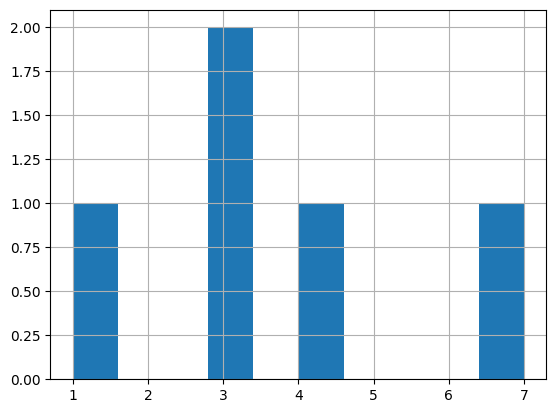

In [27]:
x.hist()

**Measure of location**


**Min/Max**

Lowest and highest observed values

In [28]:
x.mean()

3.6

In [29]:
x.max()

7

In [30]:
x.min()

1

In [31]:
print(x.min())
print(x.max())

1
7


In [32]:
x.median()

3.0

In [33]:
x = pd.Series([1,3,3,4,100])

In [34]:
x.mean()

22.2

In [35]:
x.median()

3.0

**Quantiles**

In [36]:
x = pd.Series([1,3,3,5,6,9,10,15])

In [39]:
x.quantile(0.25) #25% - quantile

3.0

In [41]:
x.quantile(0.75, interpolation = 'midpoint') #75% - quantile

9.5

**Measure of Dispersion **

Standard deviation (raleted to mean)

In [42]:
x = pd.Series([1,3,3,5,6,9,10,15])

In [43]:
x.mean()

6.5

In [44]:
x.std()

4.59813626840888

**Interquantile range (related to mean)**

Another common way of checking how much variation we have in out data. The calculation is very simple – just take the difference between the 75%-quantile and the 25%-quantile.

In [45]:
x.quantile(0.75) - x.quantile(0.25)

6.25

Pandas does not have a built-in IQR function (Interquantile Range). You can calculated it by hand as in the last example or take a look at describe, which gives you both the 75%- and the 25%-quantile

In [47]:
x.describe()

count     8.000000
mean      6.500000
std       4.598136
min       1.000000
25%       3.000000
50%       5.500000
75%       9.250000
max      15.000000
dtype: float64

**Back to the data set**

Question : What is the average age for male and female ?

In [51]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [52]:
df[df.Sex == 'male'].Age.mean()

30.72664459161148

In [53]:
df[df.Sex == 'female'].Age.mean()

27.915708812260537

**Exercise 1**

Calculate the following statistics for the Titanic dataset over all passengers, for Age and Fare:

* Average value
* Median value (or 50th quantile)
* Standard Deviation
* IQR
* Range (max-min)

In [56]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [57]:
df.Age.mean() # Age

29.69911764705882

In [58]:
df.Age.median()

28.0

In [59]:
df.Age.std()

14.526497332334042

In [62]:
df.Age.quantile(0.75) - df.Age.quantile(0.25)

17.875

In [65]:
df.Age.max()

80.0

In [66]:
df.Age.min()

0.42

In [69]:
df.Age.max() - df.Age.min() # Range

79.58

In [70]:
df.Fare.mean()  # fare

32.204207968574636

In [72]:
df.Fare.median()

14.4542

In [74]:
df.Fare.std()

49.6934285971809

In [76]:
df.Fare.quantile(0.75) - df.Fare.quantile(0.25)  # IQR

23.0896

In [77]:
df.Fare.min()

0.0

In [78]:
df.Fare.max()

512.3292

In [79]:
df.Fare.max() - df.Fare.min()  # Range

512.3292

In [81]:
df[['Age', 'Fare']].agg(
    ['min',
     'max',
     'median',
     'std']
)

,Age,Fare
min,0.420000,0.000000
max,80.000000,512.329200
median,28.000000,14.454200
std,14.526497,49.693429


**Exercise 2**

Use the plot.hist method to visualise the distribution of Age and Fare. Do you think the previously used aggregations gave you a good enough understanding of the distributions?

<Axes: >

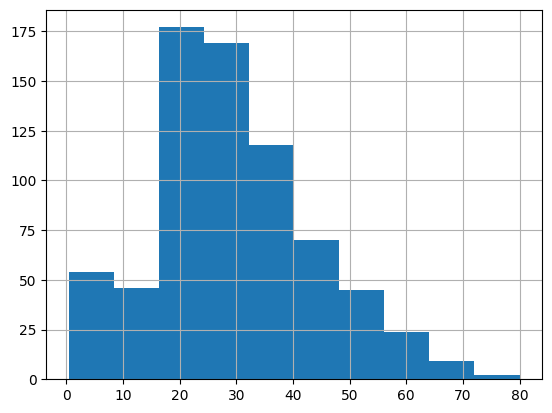

In [82]:
df.Age.hist()

<Axes: >

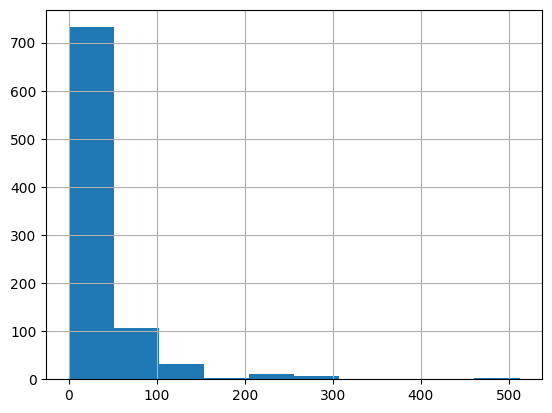

In [83]:
df.Fare.hist()

**Aggregating a DataFrame**

So far we have worked mostly with aggregating functions on a column (i.e. Series).

What do you think will happen if you call it on a DataFrame?

Try it out:

In [84]:
df.sum()

<ipython-input-84-7e5fdb616c56>:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.sum()


PassengerId                                               397386
Survived                                                     342
Pclass                                                      2057
Name           Braund, Mr. Owen HarrisCumings, Mrs. John Brad...
Sex            malefemalefemalefemalemalemalemalemalefemalefe...
Age                                                     21205.17
SibSp                                                        466
Parch                                                        340
Ticket         A/5 21171PC 17599STON/O2. 31012821138033734503...
Fare                                                  28693.9493
dtype: object

In [90]:
# we will creat a fake dataframe to make things easier

fake_data = pd.DataFrame([
  [4,4,4,2,3,2,1,3,2],
  [4,4,4,2,3,2,1,3,2],
  [4,2,4,3,3,1,1,3,2],
  [4,2,4,3,3,1,1,3,2],
])

In [92]:
fake_data.head()

,0,1,2,3,4,5,6,7,8
0,4,4,4,2,3,2,1,3,2
1,4,4,4,2,3,2,1,3,2
2,4,2,4,3,3,1,1,3,2
3,4,2,4,3,3,1,1,3,2


In [94]:
fake_data.sum(axis=0)

0    16
1    12
2    16
3    10
4    12
5     6
6     4
7    12
8     8
dtype: int64

In [96]:
fake_data.sum(axis=1)

0    25
1    25
2    23
3    23
dtype: int64

In [97]:
fake_data.sum()

0    16
1    12
2    16
3    10
4    12
5     6
6     4
7    12
8     8
dtype: int64

Using numpy functions with Pandas data

In [98]:
import numpy as np

np.mean(df.Age.values)

nan

Using Agg

In [99]:
df.Age.agg('mean')

29.69911764705882

In [102]:
df.Age.agg(['mean', 'median'])

mean      29.699118
median    28.000000
Name: Age, dtype: float64